In [25]:
from IPython.display import Image
%matplotlib inline


In [26]:
#Load the dataset
from keras.datasets.cifar10 import load_data
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test Shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test Shape:	 (10000, 32, 32, 3) (10000, 1)


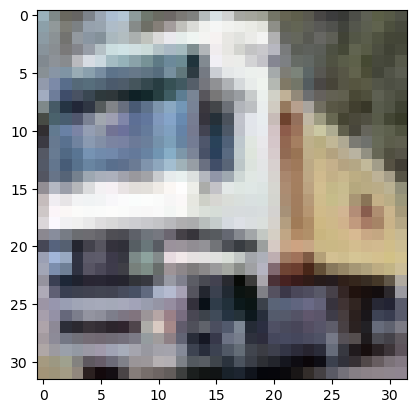

In [27]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1],cmap='Reds')


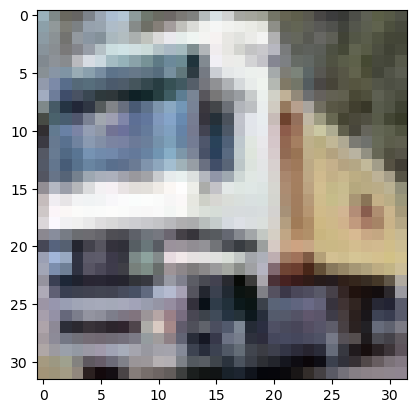

In [28]:
plt.imshow(xtrain[1],cmap='Reds_r')

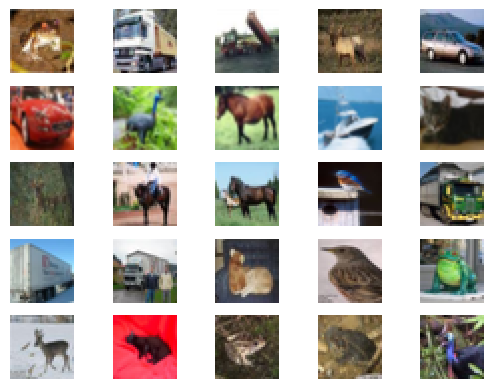

In [29]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
plt.show()


In [30]:
#Import all required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model


# Build Discriminator Model:

In [31]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #1st conv layer  
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
 
    #2nd conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
 
    #converting higher dimes into one dimen
    model.add(Flatten())
 
    #output layer
    model.add(Dense(1,activation='sigmoid'))
 
    #Compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
 
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
 
    return model

model=discriminator()
model.summary()
#plot the model
#plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 8, 8, 64)          0         
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)             

# Load & prepare the mnist training images

In [32]:
from numpy import expand_dims,ones,zeros
def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [33]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [34]:
#select real images
from numpy.random import rand,randint
def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    #generate 'real' class labels
    y=ones((n_samples,1))
    return x,y

In [35]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[1.        ],
           [1.        ],
           [1.        ]],
 
          [[1.        ],
           [1.        ],
           [1.        ]],
 
          [[1.        ],
           [1.        ],
           [1.        ]],
 
          ...,
 
          [[1.        ],
           [1.        ],
           [1.        ]],
 
          [[1.        ],
           [1.        ],
           [1.        ]],
 
          [[1.        ],
           [1.        ],
           [1.        ]]],
 
 
         [[[1.        ],
           [1.        ],
           [1.        ]],
 
          [[0.99607843],
           [0.99607843],
           [0.99607843]],
 
          [[1.        ],
           [1.        ],
           [1.        ]],
 
          ...,
 
          [[1.        ],
           [1.        ],
           [1.        ]],
 
          [[0.99607843],
           [0.99607843],
           [0.99607843]],
 
          [[1.        ],
           [1.        ],
           [1.        ]]],
 
 
         [[[1.        ],

In [36]:

def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    
    x=x.reshape(n_samples,32,32,3)
    
    #generate fake class labels
    y=zeros((n_samples,1))
    
    return x,y

In [37]:
generate_fake_samples(10)

(array([[[[0.21589233, 0.56279965, 0.21111707],
          [0.44366323, 0.49355994, 0.2866604 ],
          [0.24780594, 0.50885066, 0.41133584],
          ...,
          [0.50392181, 0.15408862, 0.51829377],
          [0.09524987, 0.12299521, 0.6764446 ],
          [0.31528114, 0.14613015, 0.66860943]],
 
         [[0.95773001, 0.82721416, 0.83458621],
          [0.68004377, 0.31884032, 0.39480823],
          [0.70216446, 0.02471495, 0.29117246],
          ...,
          [0.77025849, 0.89675756, 0.33007877],
          [0.72378747, 0.08276034, 0.46120115],
          [0.12719181, 0.23341104, 0.18905262]],
 
         [[0.10017805, 0.56161741, 0.11510559],
          [0.04438171, 0.93946338, 0.14437289],
          [0.36758816, 0.08638734, 0.54408538],
          ...,
          [0.40238611, 0.20136467, 0.08106779],
          [0.83014243, 0.97916186, 0.70538045],
          [0.50221257, 0.60460149, 0.97270192]],
 
         ...,
 
         [[0.62779364, 0.15415894, 0.16593705],
          [0.23200

# Train the Discriminator model

In [38]:
def train_discriminator(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//22)
 
    for i in range(n_iter):
       #get randomly selected 'real' images
        x_real, y_real=generate_real_samples(dataset,half_batch)
 
        #update discriminator on real images
        _, real_acc=model.train_on_batch(x_real,y_real)
    
        #generate 'fake' images
        x_fake, y_fake=generate_fake_samples(half_batch)
 
        #update discriminator fake samples
        _, fake_acc=model.train_on_batch(x_fake,y_fake)
 
         #summarize performance
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [39]:
#define the discriminator model
model=discriminator()
#load image data
dataset=load_real_samples()

# Train the model

In [40]:
train_discriminator(model,dataset)

>1 real=100% fake=9%
>2 real=100% fake=9%
>3 real=100% fake=9%
>4 real=82% fake=9%
>5 real=100% fake=9%
>6 real=82% fake=9%
>7 real=91% fake=0%
>8 real=91% fake=9%
>9 real=82% fake=9%
>10 real=73% fake=45%
>11 real=82% fake=36%
>12 real=64% fake=18%
>13 real=73% fake=36%
>14 real=64% fake=36%
>15 real=91% fake=64%
>16 real=55% fake=36%
>17 real=82% fake=36%
>18 real=91% fake=55%
>19 real=64% fake=55%
>20 real=55% fake=45%
>21 real=55% fake=45%
>22 real=64% fake=73%
>23 real=55% fake=55%
>24 real=73% fake=45%
>25 real=45% fake=82%
>26 real=45% fake=73%
>27 real=27% fake=55%
>28 real=27% fake=82%
>29 real=45% fake=82%
>30 real=45% fake=64%
>31 real=73% fake=73%
>32 real=36% fake=64%
>33 real=27% fake=73%
>34 real=9% fake=73%
>35 real=64% fake=82%
>36 real=55% fake=82%
>37 real=55% fake=82%
>38 real=36% fake=91%
>39 real=64% fake=100%
>40 real=55% fake=91%
>41 real=55% fake=91%
>42 real=45% fake=100%
>43 real=36% fake=100%
>44 real=55% fake=82%
>45 real=18% fake=82%
>46 real=45% fake=100%

# Generator model

In [41]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
   
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [42]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = generator(latent_dim)
# summarize the model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_5 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [43]:
import numpy as np
from numpy.random import randn
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [44]:

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create ✬fake✬ class labels (0)
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 190ms/step


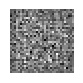

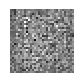

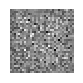

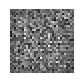

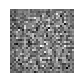

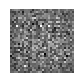

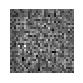

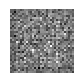

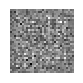

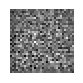

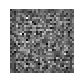

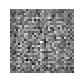

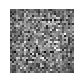

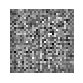

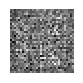

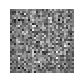

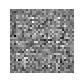

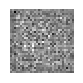

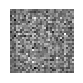

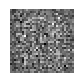

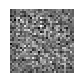

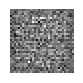

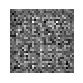

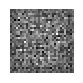

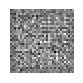

In [45]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = generator(latent_dim)
# generate samples
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    # show the figure
    plt.show()
